# Implementation of ANOVA in Python

This notebook will explore various implementation of the Analysis of Variance method (ANOVA) in python, first using numpy and Pandas, and then showing similar results using the statsmodel library. The theory and case study are inspired by the CNAM STA102 course (see here) 

## Introduction
The purpose is to study the influence of a qualitative variable $X$ with $I$ classes, on a quantitative variable $Y$. In effect, each class $i$ divides the sample into sub-groups, and the number of classes defines the number of sub-groups we will consider. The following notation is used:

 - Groups: $i = 1,2,...,I$
 - Number of observations $n = n_1 + n_2 + ... + n_I$ 
 - Observed value for sample $k$ in group $i$: $Y_{ik}$
 - Average of $Y$ in group $i$: $Y_{i \bullet} = \frac{1}{n_i}\sum_{k = 1}^{n_i} Y_{ik}$
 - General average of $Y$: $Y_{\bullet \bullet} = \frac{1}{n} \sum_{i = 1}^{I} \sum_{k = 1}^{n_i} Y_{ik}$



## ANOVA model

We chose to model the variables as follows: 

$$ Y_{ik} = \mu + \alpha_i + \epsilon_{ik}$$

- $ Y_{ik}$ is a random variable
- $\mu$ is a constant for the average effect
- $\alpha_i$ is the additive effect of group $i$
- $\epsilon_{ik}$ is the residual random variable

**Matrix form**

The model can be written using matrices:

$$ \mathbf{Y = X \Theta + \epsilon}$$

- $\mathbf{Y}: [n \times 1]$
- $\mathbf{X}: [n \times (I+ 1)]$ where each column corresponds to a class and a constant term is added.
- $\mathbf{\Theta}: [(I + 1) \times 1]$
- $\mathbf{\epsilon}: [n \times 1]$

However, note that the matrix $\mathbf{X}$ is not full rank since columns are linearly dependent, and as a result the model is not uniquely identifiable without additional constraints. 

**Assumption and distribution of $Y_{ik}$**

The random variable $\epsilon_{ik}$ is normally distributed $\epsilon_{ik} \sim N(0, \sigma^2)$ hence

$$ Y_{ik} \sim N(\mu + \alpha_i, \sigma^2)$$

Which means that the model is analoguous to the test t of Student which compares the means of two independently distributed populations. 

### Estimating the parameters of the model

Since there are $I + 1$ parameters to estimate and only $I$ equations, the model is non identifiable and constraints must be added. We choose the following two constraints:

#### A) Effect of reference group is null
Here we assume that $\alpha_I=0$ where $I$ is the reference group. This leads to minimizing the following equation: 

$$ min [ \sum_{i = 1}^{I} \sum_{k = 1}^{n_i} Y_{ik} (Y_{ik} - \mu - \alpha_i)^2 ], \ \alpha_I = 0$$

Which yields:
 - $ \hat \mu = Y_{I \bullet}$ i.e. the average of the reference group
 - $\hat \alpha_i = Y_{i \bullet} -Y_{I \bullet} $ i.e. the difference in means w.r.t. the reference group
 
#### B) Effect of different groups cancel out
Here we assume that the effect of different groups cancel out and the sum of the group effects is null $\sum_{i=1}^I \alpha_I=0$. This leads to minimizing the following equation: 

$$ min [ \sum_{i = 1}^{I} \sum_{k = 1}^{n_i} Y_{ik} (Y_{ik} - \mu - \alpha_i)^2], \ \sum_{i=1}^I \alpha_I=0$$

Which yields different results depending on the setup of the experiment. 

** Balanced design**

If the experiment is balanced, i.e. each group has the same number of observations, then
 - $ \hat \mu = Y_{\bullet \bullet}$ i.e. the overall average
 - $\hat \alpha_i = Y_{i \bullet} -Y_{\bullet \bullet} $ i.e. the difference in means w.r.t. the overall average

** Unbalanced design**

If the experiment is unbalanced, i.e. groups have a different number of observations, then
 - $ \hat \mu = \frac{1}{I} \sum_i Y_{i \bullet}$ i.e. average of the average of each group
 - $\hat \alpha_i = Y_{i \bullet} - \hat \mu $ 
 

### Interpretation of the parameters
Although the interpretation of the parameters depends on the constraints used, the predictions do not. In particular the expected value
 
 $$ E(Y_{ik}) = \hat{Y_{ik}} = \hat \mu + \hat \alpha_i = Y_{i \bullet}$$

And the difference in means between the effects of each groups are always:

$$ \hat \alpha_i - \hat \alpha_j = Y_{i \bullet} - Y_{j \bullet}$$

### Decomposition of variability
We can split the total variation as: 

Sum of Squares Total = Sum of Squares Model + Sum of Squares Residuals 
 - $SS_M$ is the sum of squares due to the model, *i.e. the variation between groups*
 - $SS_R$ is the sum of squares of residuals, i.e. *the variation within a group*

$$ SS_T = SS_M + SS_R$$
$$ \sum_i \sum_k (Y_{ik} -Y_{\bullet \bullet})^2  = \sum_i \sum_k (Y_{i \bullet} -Y_{\bullet \bullet})^2 n_i + \sum_i \sum_k (Y_{ik} -Y_{i \bullet})^2   $$

### Estimation of residual variance
We use as an unbiased estimation of the residual variance:

$$ S^2_{n-I} = \frac{SS_R}{n - I} = \frac{\sum_i \sum_k (Y_{ik} -Y_{i \bullet})^2}{n-I}$$

Note that the expectation $E(SS_R) = (n-I)\sigma^2$

### Hypothesis testing for the significance of the model
- $H_0$ the groups have no effect on $Y$ i.e. $H_0: \{ \alpha_i = ... = \alpha_I = 0 \}$
- $H_1$ the groups do have an effect on $Y$ i.e.  $H_1: \{ \alpha_i \neq ... \neq \alpha_I \neq 0 \}$

### Distributions of the sum of squares
$$ \frac{SS_R}{\sigma^2} = \frac{\sum_{i=1}^{I} \sum_{k=1}^{n_i} (Y_{ik} -Y_{i \bullet})^2}{\sigma^2} \sim \chi^2_{n - I}$$

Under the null hypothesis: $\forall i: \alpha_i = 0 $ hence

$$ \frac{SS_T}{\sigma^2} = \frac{\sum_{i=1}^{I} \sum_{k=1}^{n_i} (Y_{ik} -Y_{\bullet \bullet})^2}{\sigma^2} \sim \chi^2_{n - 1} $$

$$ \frac{SS_M}{\sigma^2} = \frac{\sum_{i=1}^{I} \sum_{k=1}^{n_i} (Y_{i \bullet} -Y_{\bullet \bullet})^2}{\sigma^2} \sim \chi^2_{I - 1} $$

We can construct a Fisher test statistic:

$$ F = \frac{SS_M / (I - 1)}{SS_R / (n - I)} \sim F_{H_0} I - 1, n - I $$

### Summary table

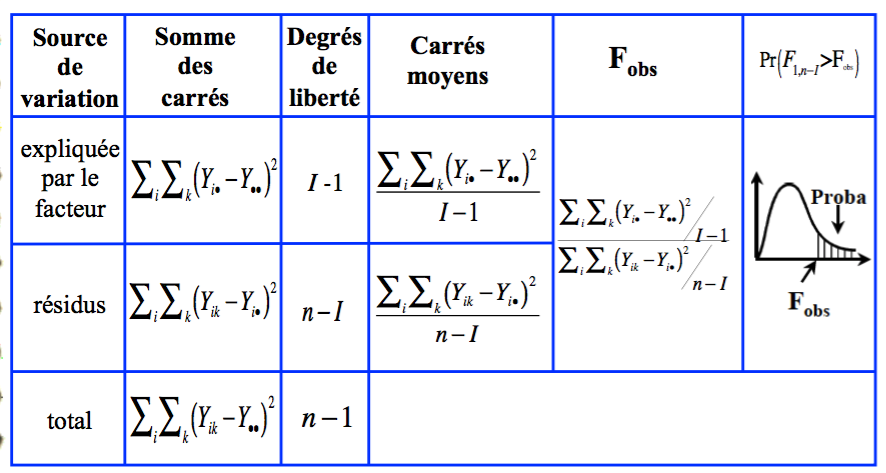

In [1]:
from IPython.display import Image
Image('/Users/User/Desktop/Data/Learning_Notebooks/images/ANOVATABLE.png')

### Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


%matplotlib inline
sns.set() #Making seaborn the default styling 

# Case study: the data
### Studying the impact of cooking oil on the weight of donuts
Does the type of cooking oil impact the quantity of oil absorbed by donuts when they are fried, and as a result, does it change their weight ? 

For each cooking oil, we have 6 observations:
 - There are 4 types of oil: $I = 4$
 - 6 observations per class: $n_i = 6$


In [3]:
Y = np.array([164,172,168,177,156, 195, 178,191,197,182,185,177,175,193,178,171,163,176,155,166,149,164,170,168   ])
X = np.array([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4])
data = pd.DataFrame({"Weight (Y)": Y, "Oil (X)": X})

## Descriptive statistics 

In [4]:
data.groupby('Oil (X)').describe()

Weight (Y)                                                       
             count   mean        std    min     25%    50%     75%    max
Oil (X)                                                                  
1              6.0  172.0  13.341664  156.0  165.00  170.0  175.75  195.0
2              6.0  185.0   7.771744  177.0  179.00  183.5  189.50  197.0
3              6.0  176.0   9.879271  163.0  172.00  175.5  177.50  193.0
4              6.0  162.0   8.221922  149.0  157.25  165.0  167.50  170.0

### Box plot 
From a simple box plot are intuition tells us that there is likely to be a statistically significant difference in the means between oil 2 and oil 4. For the other oils, it is difficult to tell without computing the statistics

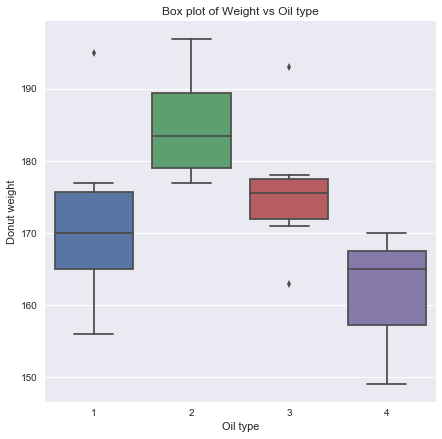

In [5]:
plt.figure(figsize = (7,7))
sns.boxplot(X,Y)
plt.title('Box plot of Weight vs Oil type')
plt.xlabel('Oil type')
plt.ylabel('Donut weight')
plt.show()

### Computing the statistics in a Python custom class 

In [23]:
class ANOVA_model(object):
    '''Class used to bundle together the data, coefficients, parameters, and statistics 
    of the one way ANOVA model '''
    
    def __init__(self,x,y):
        '''Initializing the dataset and the computed values
        '''
        self.x = x
        self.y = y
        self.data = pd.DataFrame({"Y": y, "X": x})
        self.groups = self.data.X.value_counts()
        self.n = len(self.y) 
        self.I = len(self.groups)
        
        #Initializing other variables
        self.SS_T, self.SS_M, self.SS_R = None, None, None
        self.F, self.p_value = None, None
        self.data_calc = None
        
    def fitModel(self):
        #Initializing the calculation table
        self.data_calc = self.data.copy()
        self.data_calc['n_i'] = self.data_calc.groupby('X').transform('count')
        self.data_calc['Y_i_dot'] = self.data_calc.groupby('X')['Y'].transform('mean')
        self.data_calc['Y_dot_dot'] = self.data_calc.Y.mean()
        self.data_calc['(Y - Y_i_dot)'] = (self.data_calc['Y'] - self.data_calc['Y_i_dot'])
        self.data_calc['(Y - Y_i_dot)^2'] = (self.data_calc['Y'] - self.data_calc['Y_i_dot'])**2
        self.data_calc['(Y - Y_dot_dot)^2'] = (self.data_calc['Y'] - self.data_calc['Y_dot_dot'])**2
        self.data_calc['(Y_i_dot - Y_dot_dot)^2'] = (self.data_calc['Y_i_dot'] - self.data_calc['Y_dot_dot'])**2
        
        #Calculating the sum of squares
        self.SS_T = self.data_calc['(Y - Y_dot_dot)^2'].sum()
        self.SS_M = self.data_calc['(Y_i_dot - Y_dot_dot)^2'].sum()
        self.SS_R = self.data_calc['(Y - Y_i_dot)^2'].sum()
        
        #F statistic and p value
        self.F = (self.SS_M / (self.I -1)) / (self.SS_R / (self.n - self.I))
        self.p_value = (1 - stats.f.cdf(self.F, self.I - 1, self.n - self.I ) ) 
                     
    def displayResults(self):

        df1 = pd.DataFrame(data = {'1. DF' : [self.I - 1,self.n - self.I ,self.n -1], 
                            '2. Sum of Squares':[self.SS_M, self.SS_R, self.SS_T], 
                            '3. Mean Square':[self.SS_M / (self.I - 1), self.SS_R / (self.n - self.I), ''],
                            '4. F_value':[self.F,'',''], 
                            '5. Pr > F': [self.p_value,'','']}, 
                            index = ['Model (Explained)', 'Error (Residuals)','Corrected Total'])
        
        print('Analysis of Variance')
        
        display(df1.round(3))
        
        print("Calculation table")
        display(self.data_calc)
        
        

In [24]:
model = ANOVA_model(X,Y)
model.fitModel()

In [25]:
model.displayResults()

Analysis of Variance


,1. DF,2. Sum of Squares,3. Mean Square,4. F_value,5. Pr > F
Model (Explained),3,1636.5,545.5,5.40634,0.00687595
Error (Residuals),20,2018.0,100.9,,
Corrected Total,23,3654.5,,,


Calculation table


,X,Y,n_i,Y_i_dot,Y_dot_dot,(Y - Y_i_dot),(Y - Y_i_dot)^2,(Y - Y_dot_dot)^2,(Y_i_dot - Y_dot_dot)^2
0,1,164,6,172,173.75,-8,64,95.0625,3.0625
1,1,172,6,172,173.75,0,0,3.0625,3.0625
2,1,168,6,172,173.75,-4,16,33.0625,3.0625
3,1,177,6,172,173.75,5,25,10.5625,3.0625
4,1,156,6,172,173.75,-16,256,315.0625,3.0625
5,1,195,6,172,173.75,23,529,451.5625,3.0625
6,2,178,6,185,173.75,-7,49,18.0625,126.5625
7,2,191,6,185,173.75,6,36,297.5625,126.5625
8,2,197,6,185,173.75,12,144,540.5625,126.5625
9,2,182,6,185,173.75,-3,9,68.0625,126.5625


In [ ]:
data_calc = data.copy()
data_calc['n_i'] = data_calc.groupby('X').transform('count')
data_calc['Y_i_dot'] = data_calc.groupby('X')['Y'].transform('mean')
data_calc['Y_dot_dot'] = data_calc.Y.mean()
data_calc['(Y - Y_i_dot)'] = (data_calc['Y'] - data_calc['Y_i_dot'])
data_calc['(Y - Y_i_dot)^2'] = (data_calc['Y'] - data_calc['Y_i_dot'])**2
data_calc['(Y - Y_dot_dot)^2'] = (data_calc['Y'] - data_calc['Y_dot_dot'])**2
data_calc['(Y_i_dot - Y_dot_dot)^2'] = (data_calc['Y_i_dot'] - data_calc['Y_dot_dot'])**2

data_calc

In [ ]:
data_calc.sum()

In [ ]:
SS_T = data_calc['(Y - Y_dot_dot)^2'].sum()
SS_M = data_calc['(Y_i_dot - Y_dot_dot)^2'].sum()
SS_R = data_calc['(Y - Y_i_dot)^2'].sum()
print(SS_T, SS_M, SS_R,  SS_M + SS_R,)

In [ ]:
t = data.groupby('X').transform('mean')
Y[:,np.newaxis] - t

In [ ]:
Y

In [ ]:
data.groupby('X').count()

In [ ]:
np.sum((Y - Y.mean())**2)

In [ ]:
data.Y.mean()

### Distribution and QQ plot 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1 = sns.distplot(population.Taille, ax = ax1, bins = 10)
ax2 = stats.probplot(population.Taille, dist = "norm", plot = plt)

In [ ]:
population = pd.read_csv("ANOVA_POPULATION.csv")
Hol = population[population["Nation"] == "Hol"].Taille.values
All = population[population["Nation"] == "All"].Taille.values
Esp = population[population["Nation"] == "Esp"].Taille.values
population

## Descriptive statistics  

In [ ]:
display(population.groupby("Nation").describe())

## Boxplots 

In [ ]:
ggplot(population, aes(x = "Nation" , y = "Taille")) + geom_boxplot() \
+  ggtitle("Population height by nation")

## Tests for normality 

In [ ]:
#Testing the normality of the resulting bootstrap distribution
print("Sample size = ", population.Taille.values.size)

#Shapiro-Wilk
print("Shapiro Wilk test:", stats.shapiro(population.Taille))

#Kolmogorov-Smirnov
print("Kolmogorov-Smirnov test:", stats.kstest(population.Taille, cdf = 'norm'))

#Anderson-Darling
print("Anderson-Darling test: ", stats.anderson(population.Taille))

#D’Agostino and Pearson
print("D’Agostino and Pearson test:  ", stats.normaltest(population.Taille))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
ax1 = sns.distplot(population.Taille, ax = ax1, bins = 10)
ax2 = stats.probplot(population.Taille, dist = "norm", plot = plt)

## Levene test


In [ ]:
stats.levene(Hol,Esp,All)

## Kruskal Wallis 

In [ ]:
stats.kruskal(Hol,Esp,All)

## Wilcoxon Scores 

In [ ]:
stats.wilcoxon(Hol, y=All, zero_method='wilcox', correction=False)

In [ ]:
F, p = stats.f_oneway(Hol, All,Esp)
display(F,p)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Taille ~ Nation',
                data=population).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

In [ ]:
print(mod.summary())